# <i class="fas fa-circle exercise"></i>Learning an Affine Transformation
<span class="badge badge-pill important-bg">regular</span>


<figure>
<img src="images/AffineTransformTask.svg" style="width:20%">
<figcaption align = "center"> Naming the planes and transformations. </figcaption>
</figure>

Lets assume that an affine mapping is sufficient  to transform image coordinates  of a
person walking in the atrium at ITU to an overview map (image) of the ground floor of ITU.
The goal of this exercise is learn the coefficients of the affine mapping given training data and then subsequently map the tracking coordinates for the person in the video is given in `trackingdata.dat`.

As shown in the figure above, denote  
1. the video `ITUStudent.mov`  by $V$, 
2. the ground floor in $V$ by $G$ 
3. the groundplane of ITU building by $M$ 
4. The affine transformation ${T}_G^M$ from the ground floor $G$ to
the overview map $M$.



Your goal is to learn the coefficients of the affine transformation and apply the mapping to tracking tracking data to the overview map. 



Hence  your task is 
1. Learn the coefficients of the affine transformation  ${T}_G^M$ and
2. Apply the mapping ${T}_G^M$ to transform the tracking data from the ground floor $G$ in $V$ to $M$ and display the location of the person on the ground floor.

## Overview

Your main task is to implement the function `calc_affine()` that given points in $V$ and $M$ estimates and returns the corresponding affine transformation matrix $T$.


The 3 pairs of corresponding points and tracking data are provided for you in the input folder. The
tracking data is loaded from `trackingdata.dat` where each row $r_i$ in the
file is associate to a frame $f_i$ in the video `ITUStudent.mov` and contains
the coordinates of 3 rectangles as shown in the figure below. 

Each rectangle is defined by a  coordinates pair $(x_1, y_1)$ and $(x_2, y_2)$ corresponding to the top left and
bottom right hand corners of the rectangle. The rectangles for specific bodyparts are stored  in a dictionary `data` that has keys *body*, *legs*, and *all*. 
to  access the arrays of the corresponding bodyparts.  
 

<figure>
<img src="images/trackingData.jpg" style="width:20%">
<figcaption align = "center"> The three sub-regions of the person being tracked. </figcaption>
</figure>



### (Pen & Paper) Background on Affine mappings

Let an affine mapping  $T$ be given by

$$ T = 
\begin{bmatrix}
    a & b & c \\
    d & e & f \\
    0 & 0 & 1
\end{bmatrix}
$$

where $T$  transforms points between the planes by $p^{\prime} = T p$ and
$p$ and $p^{\prime}$ are 2D  homogeneous coordinates.

Since the transformation is linear it is possible to estimate the 6 coefficients $\theta = \begin{bmatrix} a \\ b \\ c\\ d \\ e \\ f \end{bmatrix}$ using pairs of corresponding input-output points.

1. On a piece of paper show that given an input $p=\begin{bmatrix} x_1 \\ x_2 \\1\end{bmatrix}$ and output $p'=\begin{bmatrix} x'_1 \\ x'_2 \\1\end{bmatrix}$ that the unknowns $\theta$ can be isolated into the following inner product

$$\begin{bmatrix}
    x_1 & y_1 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & x_1 & y_1 & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
    a \\
    b \\
    c \\
    d \\
    e \\
    f
\end{bmatrix}
= 
\begin{bmatrix}
    x_1^{\prime} \\
    y_1^{\prime} \\
    \end{bmatrix}
$$

This means that one pair of corresponding points yield two equations. 


1. Show that the unknowns $\theta$ can be by solved through  $\theta = A^{-1}y^{\prime}$,  where $A$ is the designmatrix and argue why $3$ pairs of corresponding points are needed to solve for the unknowns $\theta$ 

$A = \begin{bmatrix}
    x_1 & y_1 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & x_1 & y_1 & 1 \\
    x_2 & y_2 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & x_2 & y_2 & 1 \\
    x_3 & y_3 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & x_3 & y_3 & 1 
\end{bmatrix}$,
 $y^{\prime} = \begin{bmatrix}
    x_1^{\prime} \\
    y_1^{\prime} \\
    x_2^{\prime} \\
    y_2^{\prime} \\
    x_3^{\prime} \\
    y_3^{\prime}
\end{bmatrix}$



A pre-selected set of 3 point pairs (in the different planes) are loaded.

In [2]:
# importing needed libraries
import matplotlib.pyplot as plt
import numpy as np

#### loading data
points_source = np.load('points_source.npy')
points_destination = np.load('points_destination.npy')

The 3 pairs of points are visualized in the code below

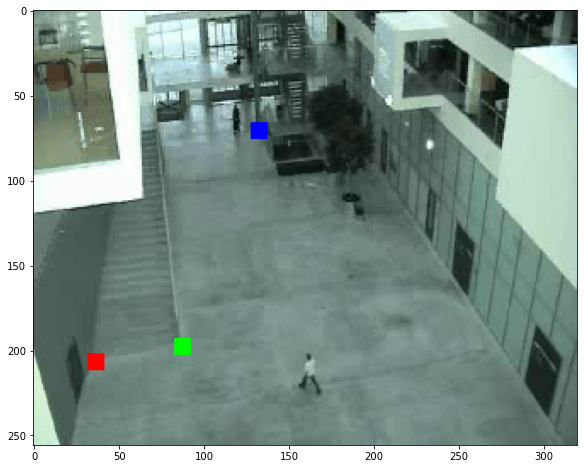

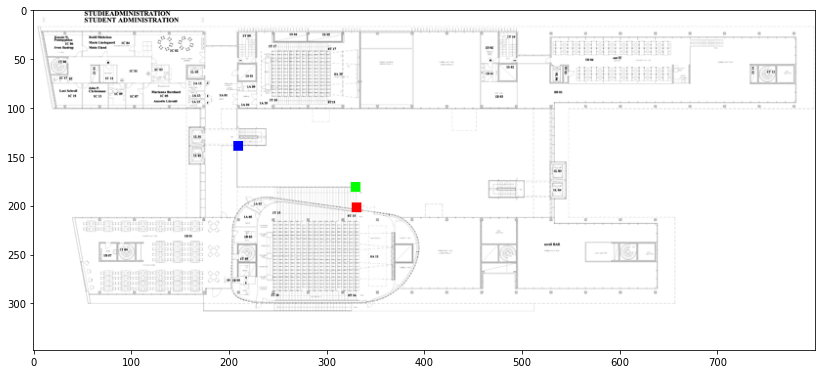

In [3]:
ITU_image = plt.imread('inputs/image_ground.jpg')
ITU_RGB = ITU_image[:,:,:3]
plt.figure(figsize=(14,8))
ITU_RGB[int(points_source[0,1])-5:int(points_source[0,1])+5,int(points_source[0,0])-5:int(points_source[0,0])+5] = np.array([255,0,0])
ITU_RGB[int(points_source[1,1])-5:int(points_source[1,1])+5,int(points_source[1,0])-5:int(points_source[1,0])+5] = np.array([0,255,0])
ITU_RGB[int(points_source[2,1])-5:int(points_source[2,1])+5,int(points_source[2,0])-5:int(points_source[2,0])+5] = np.array([0,0,255])
plt.imshow(ITU_RGB)

ITU_Map = plt.imread('inputs/ITUMap.png')
plt.figure(figsize=(14,8))
Map_RGB = ITU_Map[:,:,:3]
Map_RGB[int(points_destination[0,1])-5:int(points_destination[0,1])+5,int(points_destination[0,0])-5:int(points_destination[0,0])+5] = np.array([1,0,0])
Map_RGB[int(points_destination[1,1])-5:int(points_destination[1,1])+5,int(points_destination[1,0])-5:int(points_destination[1,0])+5] = np.array([0,1,0])
Map_RGB[int(points_destination[2,1])-5:int(points_destination[2,1])+5,int(points_destination[2,0])-5:int(points_destination[2,0])+5] = np.array([0,0,1])
plt.imshow(Map_RGB);

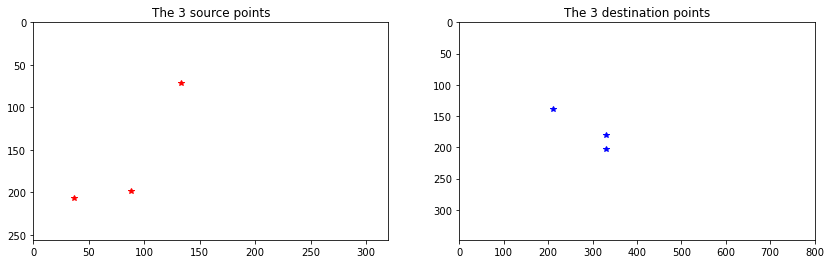

In [4]:
### We can also visualize the points by them self
plt.figure(figsize=(14,4))
plt.subplot(1,2,1),plt.plot(points_source[:,0],points_source[:,1],'r*'),plt.ylim(256,0),plt.xlim(0,320),plt.title('The 3 source points')
plt.subplot(1,2,2),plt.plot(points_destination[:,0],points_destination[:,1],'b*'),plt.ylim(348,0),plt.xlim(0,800),plt.title('The 3 destination points')
plt.ylim(348,0);

# Implement learning of the affine model

With the points loaded, lets denote  $P_{i}^{G}$ and $P_{i}^{M}$ the points in the ground plane $G$ ('point_source') and the overview map $M$ ('points_destination'), respectively. 
Your task is to create a function that can estimate the parameters of the affine model using the selected points datapoints.

In the cell below your task is to in to implement the function `calc_affine(points_source,points_destination)` so that it returns the  affine transformation $T$ that takes 'points_source' to 'points_destination'. 
The function should do the following:
* Create the design matrix $A$ 
* Estimate the parameters $\theta$ using the inverse $A^{-1}$
* Return the affine transformation matrix $T$

In [13]:
### affine tranformation creation

def calc_affine(points_source,points_destination):
    """Estimate the affine transformation matrix using the corresponding points pairs"""
    return None # Replace

T = calc_affine(points_source,points_destination)
print('Affine Trasformation Matrix:\n',T)

Affine Trasformation Matrix:
 [[ 1.56949934e-01  1.00049407e+00  1.18090580e+02]
 [-3.76976285e-01  1.97134387e-01  1.75141304e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Estimate points in the overview map

In this task you will use the transformation to display the path walked by a
student in the overview map. Use `load_data()` (provided in the cell below) to generate the `data` the dictionary with the different regions of the tracked person in the $G$ view
Then use the affine tranformation to map the points in `data['legs']`) that are on the ground
floor $G$ to the overview map $M$.

All the entries in `data` contain points $(x_i, y_i, x_i, y_i)$ in a $N\times 4$
array, i.e. the points for the $i$th frame can be accessed using `data[i]`.


In [1]:
def load_data():
    """Loads the tracking data."""
    filename = "inputs/trackingdata.dat"
    data = np.loadtxt(filename)
    data = {"body": data[:, :4], "legs": data[:, 4:8], "all": data[:, 8:]}
    
    return data


In [7]:
### Load data 
data = load_data()

You need to select a point on the floor.  A fair approximation is to use the center of the bounding boxes (in homogenious coordinates)

In [8]:
### Needed functions

def to_homogeneous(points):
    if len(points.shape) == 1:
        points = points.reshape((*points.shape, 1))
    return np.vstack((points, np.ones((1, points.shape[1]))))


def to_euclidean(points):
    return points[:2] / points[2]

def get_center(part, i):
    """Returns center of body part in homogeneous coordinates.

    Parameters: part refers to a Nx4 array containing rectangle points for a specific
    body part. i refers to the frame index to fetch.
    """
    x = int((part[i, 0] + part[i, 2]) / 2)
    y = int((part[i, 1] + part[i, 3]) / 2)

    return to_homogeneous(np.array([x, y]))


Tasks:
1. Implement the function `apply_affine(T, point)`. It should
   transform `point` in homogeneous coordinates using transformation matrix `T` and return the result as in euclidean coordinate.

In [9]:
#### transforming points

# Exercise
def apply_affine(T, point):
    """Apply affine transformation h to point."""
    return None # Replace


2. Use the `get_center` and `apply_affine` functions to create a function `transform_points(part:str,data,T)`. That take the tracking data `data` a specified body part `part` (string value) and the Affine transformation $T$ as input and return the centered points `G_points` and `M_points`. Where `G_points` is the tracking data points in the video view $G$. `M_points` is the transformed points in the ITU map view. _Hint:_ Iterate over the tracking data and transform the bodypart center for each frame.   


In [10]:


def transform_points(part:str,data,T):
    """Apply affine transformation to all points in tracking data for a specific part"""

    return None # Replace
    

In [11]:
### Use your recently created function to transform the tracking data
G_points, M_points = transform_points("legs",data,T)

In the cell code is given that visualize the points in the $G$ and $M$ view

3. Plot the tracking data for all the different body parts

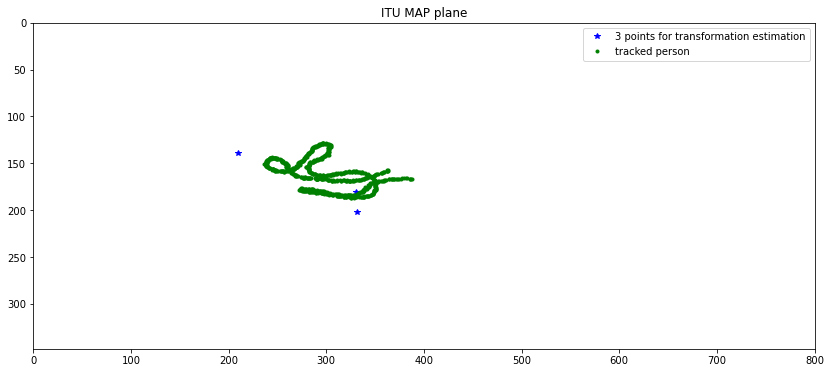

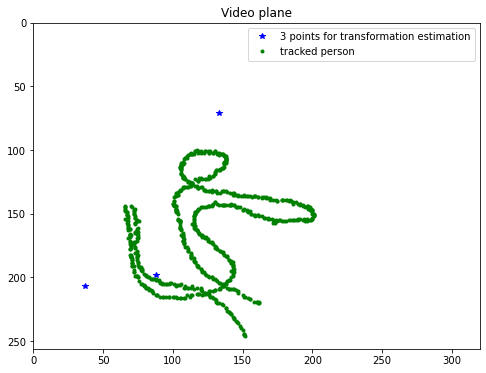

In [12]:
#### Visualize transformed points
plt.figure(figsize=(14,6))
plt.plot(points_destination[:,0],points_destination[:,1],'b*',label="3 points for transformation estimation")
plt.plot(M_points[:,0],M_points[:,1],'g.',label="tracked person")
plt.ylim(348,0)
plt.xlim(0,800)
plt.title('ITU MAP plane')
plt.legend()
plt.show()

##### orignal plane visualization

plt.figure(figsize=(8,6))
plt.plot(points_source[:,0],points_source[:,1],'b*',label="3 points for transformation estimation")
plt.plot(G_points[:,0],G_points[:,1],'g.',label="tracked person")
plt.ylim(256,0),plt.xlim(0,320)
plt.title('Video plane')
plt.legend()
plt.show()

Also compare with the video, to gauge the quality of the tranformation. 

* Can you find any arguments as for why this tranfomation could be somewhat limited?